In [2]:
import numpy as np
import matplotlib.pyplot as plt
import histlite
from tqdm.notebook import tqdm
import seaborn as sns

import sys
sys.path.append('/p/lustre1/yu47/Sterile_Neutrino/sensitivity/')

from neutrino_source import neutrino_source
from detector import detector
from MC_generator import gen_LZ
from MC_generator import MC_generator

In [3]:
# nEXO exp
source_nEXO = neutrino_source('Cr51', 1e5, [0.75], [1.0])
det_nEXO = detector('nEXO')
det_nEXO.update_geometry(1.183, 1.133)
det_nEXO.position = (0, 0, 0)
dist = 0.1
source_nEXO.position = (0, 0, -det_nEXO.height/2-dist)
det_nEXO.run_time = 100 # days


A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.


In [4]:
import MC_generator
import importlib
importlib.reload(MC_generator)

# no oscillation:
dm2, sin2theta_square = 0., 0.

import MC_generator
gen1 = MC_generator.MC_generator(source_nEXO, det_nEXO, dm2=dm2, sin2theta_square=sin2theta_square, int_type='CC'); 

A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.


In [14]:
print(gen1.n_events_noosc)
#gen1.load_even_rate_file()

5924.611265866583


In [15]:
pos0, bl0 = gen1.generate_dataset(data_dm2=1.0, data_sin2=0.5)
pos1, bl1 = gen1.generate_dataset(data_dm2=5.0, data_sin2=0.8)
pos2, bl2 = gen1.generate_dataset(data_dm2=0.0, data_sin2=0.0)

Expected event number is 4263.770548919039.
Expected event number is 3406.5187262212744.
Expected event number is 5924.564047929788.


Text(0.5, 0, 'Baselin [m]')

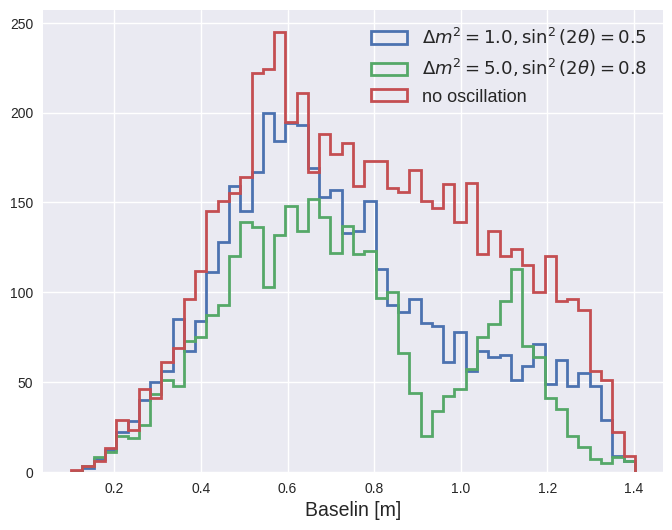

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(bl0, bins=50, range=(gen1.baseline_min, gen1.baseline_max), lw=2, histtype='step', label=r'$\Delta m^2=1.0, \sin^2(2\theta)=0.5$')
ax.hist(bl1, bins=50, range=(gen1.baseline_min, gen1.baseline_max), lw=2, histtype='step', label=r'$\Delta m^2=5.0, \sin^2(2\theta)=0.8$')
ax.hist(bl2, bins=50, range=(gen1.baseline_min, gen1.baseline_max), lw=2, histtype='step', label=r'no oscillation')
ax.legend(fontsize=13)
ax.set_xlabel('Baselin [m]', fontsize=14)

In [41]:

bin_width = 0.03
h0 = gen1.generate_asimov_dataset(0, 0.0,   coarse_step_bl=bin_width )
h1 = gen1.generate_asimov_dataset(1.0, 0.1, coarse_step_bl=bin_width )
h2 = gen1.generate_asimov_dataset(1.0, 0.5, coarse_step_bl=bin_width )
h3 = gen1.generate_asimov_dataset(5.0, 0.5, coarse_step_bl=bin_width )

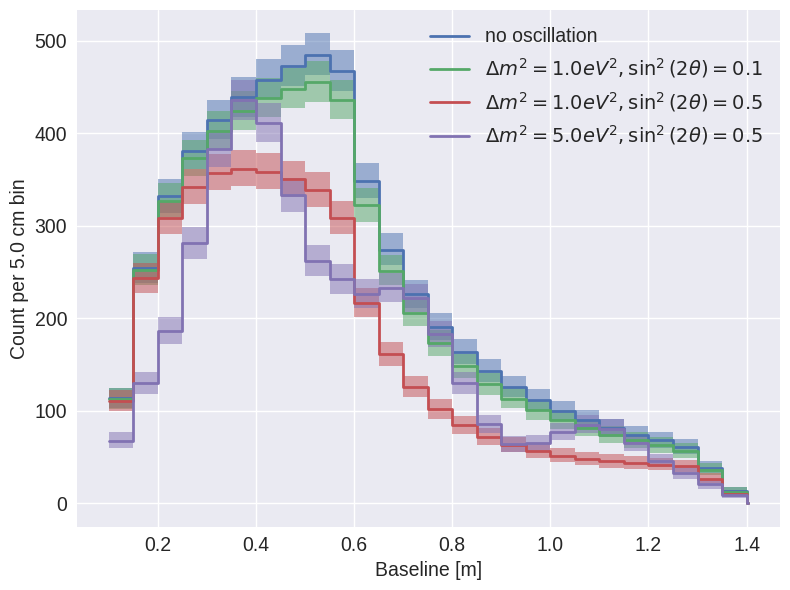

In [32]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
lstyle = histlite.LineStyle(line=True, poisson=True, errorbands=True)
histlite.plot1d(ax, h0, lw=2, style=lstyle, label='no oscillation')
histlite.plot1d(ax, h1, lw=2, style=lstyle, label=r'$\Delta m^2=1.0 eV^2, \sin^2(2\theta)=0.1$')
histlite.plot1d(ax, h2, lw=2, style=lstyle, label=r'$\Delta m^2=1.0 eV^2, \sin^2(2\theta)=0.5$')
histlite.plot1d(ax, h3, lw=2, style=lstyle, label=r'$\Delta m^2=5.0 eV^2, \sin^2(2\theta)=0.5$')
ax.legend(fontsize=14)
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel(f'Count per {bin_width*100} cm bin', fontsize=14)
ax.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig(f'../plots/asimov_dataset_examples_bl10cm_Ev750keV_binwidth{bin_width*100}cm.png')

In [6]:
# Generate 1000 events without oscillation
from tqdm import tqdm
h0 = gen1.generate_asimov_dataset(0.0, 0.0)
hs = []
n_bins = h0.n_bins[0]
edges = h0.bins[0]
for evno in tqdm(range(10)):
    pos, bl = gen1.generate_dataset(0.0, 0.0, )
    
    hs.append( histlite.hist(bl, bins=n_bins, range=(edges[0], edges[-1])) )
    

100%|██████████| 10/10 [00:52<00:00,  5.28s/it]


In [16]:
for h in hs:
    print(np.sum(h.values))

5925.0
5925.0
5925.0
5925.0
5925.0
5925.0
5925.0
5925.0
5925.0
5925.0


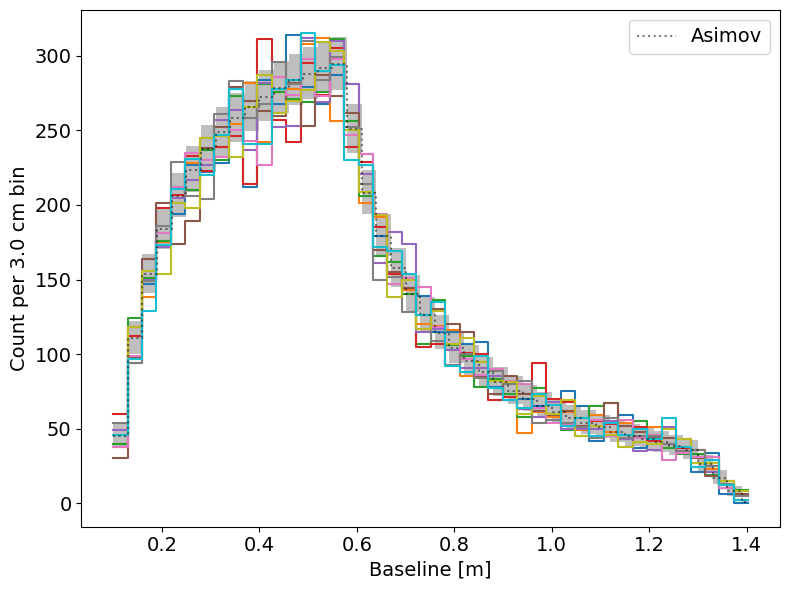

In [12]:
bin_width = 0.03
fig, ax = plt.subplots(figsize=(8, 6))
for h in hs:
    histlite.plot1d(ax, h, )
lstyle = histlite.LineStyle(line=True, poisson=True, errorbands=True)
histlite.plot1d(ax, h0, style=lstyle, color='black', linestyle=':', label='Asimov', alpha=0.5)
ax.legend(fontsize=14)
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel(f'Count per {bin_width*100} cm bin', fontsize=14)
ax.tick_params(labelsize=14)
plt.tight_layout()

plt.savefig('../plots/nooscillation_10MCevents_nofluc_nosmear_3cmbinwidth.pdf')

In [10]:
# Generate 1000 events without oscillation
h0 = gen1.generate_asimov_dataset(0.0, 0.0)
hs1 = []
n_bins = h0.n_bins[0]
edges = h0.bins[0]
for evno in tqdm(range(10)):
    pos, bl = gen1.generate_dataset(0.0, 0.0, poisson=True, smear=True)
    hs1.append( histlite.hist(bl, bins=n_bins, range=(edges[0], edges[-1])) )
    

0


1


2


3


4


5


6


7


8


9


100%|██████████| 10/10 [00:43<00:00,  4.36s/it]


In [17]:
for h in hs1:
    print(np.sum(h.values))

5848.0
5858.0
5823.0
5759.0
5903.0
5848.0
5982.0
5846.0
6026.0
5982.0


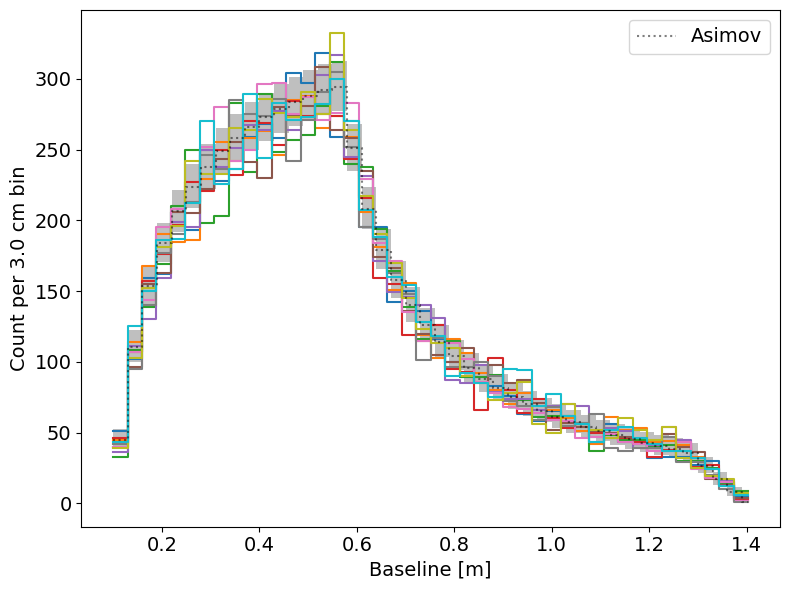

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
for h in hs1:
    histlite.plot1d(ax, h, )
lstyle = histlite.LineStyle(line=True, poisson=True, errorbands=True)
histlite.plot1d(ax, h0, style=lstyle, color='black', linestyle=':', label='Asimov', alpha=0.5)
ax.legend(fontsize=14)
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel(f'Count per {bin_width*100} cm bin', fontsize=14)
ax.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig('../plots/nooscillation_10MCevents_poissonfluc_possmear_3cmbinwidth.pdf')

In [15]:
gen1.det.spatial_resolution

0.01